## 3. Convolutional Neural Network (CNN) en CIFAR.

> a) La librería _keras_ hace automáticamente el trabajo de importar el conjunto de entrenamiento ($x\_train$, $y\_train$) y el de prueba ($x\_test$, $y\_test$). Sólo falta obtener el de validacion ($x\_val$, $y\_val$), el cual corresponde a 5.000 elementos del _set_ de entrenamiento. <br>
En el conjunto de datos hay presentes diez clases, las cuales se codifican con un número inciando desde el $cero$ hasta el $nueve$. El orden de las clases está determinado alfabéticamente por la palabara en inglés. Las diez clases y sus índices corresponden a:
+ 0 - airplane (avión)
+ 1 - automobile (automóvil)
+ 2 - bird (pájaro)
+ 3 - cat (gato)
+ 4 - deer (ciervo)
+ 5 - dog (perro)
+ 6 - frog (rana)
+ 7 - horse (caballo)
+ 8 - ship (barco)
+ 9 - truck (camión)


In [1]:
from keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)

C:\Users\Edu\Anaconda3\envs\neuronales\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(50000, 32, 32, 3) (50000, 1)


> No se crearán los conjuntos de validación ($x\_val$, $y\_val$) porque las funciones de entrenamiento dispuestas por _keras_ disponen de un parámetro llamado <i>validation_split</i> el que toma valores decimales. Este valor es utilizado para extraer una porción del conjunto de entrenamiento con propósitos de validar la eficacia de la red. Si en un comienzo

$$x\_train \in \mathbb{N}_{0}^{dim \times 32 \times 32 \times 3}$$

> después de aplicar <i>validation_split</i> se tienen dos conjuntos donde

$$dim_{1} = dim - \lfloor dim \cdot validation\_split \rfloor$$
$$dim_{2} = \lfloor dim \cdot validation\_split \rfloor$$
$$x\_train \in \mathbb{N}_{0}^{dim_{1} \times 32 \times 32 \times 3}$$
$$x\_val \in \mathbb{N}_{0}^{dim_{2} \times 32 \times 32 \times 3}$$

> para obtener el conjunto $y\_val$ se procede de la misma forma.

> b) Al ver la forma de la matriz de entrenamiento ($50.000 \times 32 \times 32 \times 3$) se entiende que el canal de colores va al final, por ende se tiene un orden _major-to-minor_ el cual es el que se usa por defecto en _Tensor Flow_. Siendo este el caso no es necesario realizar ninguna transposición en las matrices. <br>
Considerado eso el siguiente paso es normalizar los datos de la imagen dividiendo la matriz por 255. Cada elemento de la matriz corresponde a la intensidad que tiene un determinado pixel en uno de los canales. Los valores de los pixeles en las imagenes de tipo RGB sólo se mueven entre 0 y 255, al dividir por 255 se dejarían todos los elementos entre 0 y 1. <br>
A continuación se transforman los conjuntos de salida ($y\_train$, $y\_test$) en vectores binarios, al ser éstos de 10 niveles los conjuntos generados serán de 10 columnas.

In [2]:
import keras

x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 10)


> c) En _keras_ con _Sequential_ se crea un modelo de red neuronal. Estos modelos si no se les pasa ningún argumento vienen sin nada, por ello se le debe ir agregando capas de neuronas, funciones de activaciones, de pooling, regularizadores, etcétera.
Para este caso se añade dos veces seguidas: 
+ Una capa convolucional con 64 _feature maps_, cada uno con filtros de tamaño $3 \times 3$, stride de 1 y una modalidad de **_same padding_**.
+ Una función de activación relu para la preactivación de la capa convolucional.
+ Una función de pooling con filtros de $2 \times 2$.   

> La modalidad de **_same padding_** se entiende como: Para una convolución se produce una salida del mismo tamaño que la entrada. Esto se logra añadiendo ceros al rededor de la matriz de entrada hasta producir el efecto deseado. <br>
Como alternativa a esta modalidad existe **_valid padding_**, la cual opera como una convolución normal produciendo una salida de menor tamaño que la entrada.

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from IPython.display import Markdown, display

def generar_modelo_c(padding, resumen=True):
    display(Markdown("##### " + padding + " padding"))
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding=padding, input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding=padding))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    if resumen:
        model.summary() 
    return model

In [56]:
generar_modelo_c(padding='valid')
generar_modelo_c(padding='same')

##### valid padding

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
activation_65 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
activation_66 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 2304)              0         
__________

##### same padding

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_69 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_70 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 4096)              0         
__________

> Como se puede apreciar la dimensionalidad no se mantiene cuando se usa _valid padding_ a diferencia de cuando se usa con _same padding_. <br>
Por otra parte se puede ver el efecto de pooling, ya que reduce una capa de dimensionalidad $32 \times 32 \times 64$ a una de $16 \times 16 \times 64$ y posteriormente de igual forma una capa de $16 \times 16 \times 64$ es reducida a una de $8 \times 8 \times 64$. <br>
También se hace evidente el cambio de la topología original al hacer el achatamiento (o _flatten_). Se pasa de matrices N-dimensionales a un vector para poder usarlo con la red _feed forward_ le precede a la red convolucional.
La red _feed forward_ esta compuesta de dos capas:
+ Con 512 neuronas y función de activación ReLU.
+ Con 10 neuronales, que corresponden a cada una de las clases y función de activación _softmax_.

> d) Para controlar el learning rate cada 10 _epochs_ se utiliza la función

$$step\_decay(epoch) = max \left\{ 0.001 \cdot \left( \frac{1}{2} \right)^{\lfloor \frac{epoch}{10} \rfloor} ; 0.00001 \right\} $$

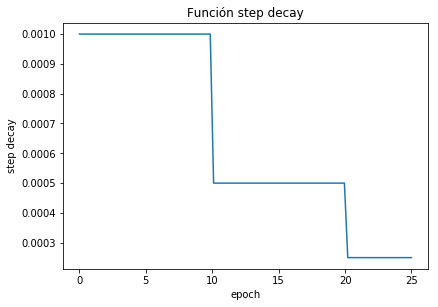

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt

x_d = np.linspace(0,25,100)
y_d = np.maximum(0.001 * np.power(0.5, np.floor(x_d/10)),0)
plt.plot(x_d, y_d)
plt.tight_layout()
plt.ylabel('step decay')
plt.xlabel('epoch')
plt.title('Función step decay')
plt.show()

> El gráfico representa el comportamiento esperado del _learning rate_ en base a los _epochs_. Se comprobará en la práctica si se cumple este comportamiento. <br>
Además se probará con distintos tamaños de _batch_, ya que éste no es especificado en el enunciado. <br>
La librería _keras_ provee herramientas que permiten graficar fácilmente los errores de entrenamiento para el conjunto de entrenamiento y de validación. Sin embargo para graficar el conjunto de prueba durante cada epoch es necesario crear un _callback_ que se encargue de hacer el calculo y guardar el registro de los errores de prueba durante el entrenamiento. En este caso la función encargada de ello es _TestLossAcc_, la cual al finalizar cada epoch guarda un registro del error que se obtiene con la red al evaluar el conjunto de prueba en ésta. Junto con el error, esta función también guarda la precisión y el learning rate, el cual será usado posteriormente para probar que el comportamiento en la practica es tal como el esperado. <br>
El objeto _LearningRateScheduler_ se encarga de actualizar el learning rate que usa el optimizador en cada epoch, recibe como parámetro la función que se encargará de retornar el valor a utilizar, en este caso es <i>step_decay</i>. <br>
Se crea una función llamada <i>hiperparametros_d</i> la cual prueba distintos tamaños de _batch_ y retorna los errores y la precisión obtenida en cada modelo entrenado.

In [39]:
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
from keras import backend as K
from scipy.stats import randint as sp_randint
import math

def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((epoch)/10))
    lrate = max(lrate,0.00001)
    return lrate

class TestLossAcc(keras.callbacks.Callback):
    def __init__(self, x_test_set, y_test_set):
        self.x_test_set = x_test_set
        self.y_test_set = y_test_set
        
    def on_epoch_end(self, epoch, logs={}):
        loss, acc = self.model.evaluate(self.x_test_set, self.y_test_set, verbose=0)
        logs['test_loss'] = loss
        logs['test_acc'] = acc
        logs['learning_rate'] = K.eval(self.model.optimizer.lr)
        print(' test_loss: {} - test_acc: {} - learning_rate: {}'.format(loss, acc, K.eval(self.model.optimizer.lr)))
        

def generar_modelo_d():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def entrenar_modelo_d(model, batch_size):
    opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
    lrate = LearningRateScheduler(step_decay)
    
    model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
    hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=25, validation_split=1/12, shuffle=True, 
                     callbacks=[lrate, TestLossAcc(x_test, y_test)])
    score = model.evaluate(x_test, y_test)
    return (hist, score)

def hiperparametros_d(batches):
    resultados = {}
    for batch_size in batches:
        display(Markdown("##### Batch size de: " + str(batch_size)))
        model = generar_modelo_d()
        (hist, score) = entrenar_modelo_d(model, batch_size)
        resultados[batch_size] = {'hist':hist, 'score':score,}
    
    return resultados

def graficos_d(batch_size, hist, score):
    plt.plot(hist.history['learning_rate'])
    plt.title('Learning rate con mini batches de ' + str(batch_size))
    plt.ylabel('learning rate')
    plt.xlabel('epoch')
    plt.show()
    
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['test_loss'])
    plt.title('Loss con mini batches de ' + str(batch_size))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['entrenamiento', 'validación', 'prueba'], loc='upper right')
    plt.show()

    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.plot(hist.history['test_acc'])
    plt.title('Accuracy con mini batches de ' + str(batch_size))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['entrenamiento', 'validación', 'prueba'], loc='lower right')
    plt.show()

    print("Pérdida", score[0])
    print("Precisión", score[1])

In [30]:
resultados_d = hiperparametros_d([32,64,128])

##### Batch size de: 32

Train on 45833 samples, validate on 4167 samples
Epoch 1/25
45833/45833 [==============================] - 23s 508us/step - loss: 1.9372 - acc: 0.3059 - val_loss: 1.6709 - val_acc: 0.4024
 test_loss: 1.656737088394165 - test_acc: 0.4164 - learning_rate: 0.0010000000474974513
Epoch 2/25
45833/45833 [==============================] - 20s 435us/step - loss: 1.5487 - acc: 0.4486 - val_loss: 1.4294 - val_acc: 0.4989
 test_loss: 1.4204058990478516 - test_acc: 0.4966 - learning_rate: 0.0010000000474974513
Epoch 3/25
45833/45833 [==============================] - 20s 434us/step - loss: 1.3721 - acc: 0.5126 - val_loss: 1.3312 - val_acc: 0.5316
 test_loss: 1.339592290687561 - test_acc: 0.527 - learning_rate: 0.0010000000474974513
Epoch 4/25
45833/45833 [==============================] - 20s 435us/step - loss: 1.2591 - acc: 0.5535 - val_loss: 1.1928 - val_acc: 0.5884
 test_loss: 1.1971336420059204 - test_acc: 0.5748 - learning_rate: 0.0010000000474974513
Epoch 5/25
45833/45833 [==================

##### Batch size de: 64

Train on 45833 samples, validate on 4167 samples
Epoch 1/25
45833/45833 [==============================] - 15s 336us/step - loss: 2.0411 - acc: 0.2727 - val_loss: 1.8634 - val_acc: 0.3367
 test_loss: 1.8520193979263306 - test_acc: 0.3431 - learning_rate: 0.0010000000474974513
Epoch 2/25
45833/45833 [==============================] - 15s 323us/step - loss: 1.7523 - acc: 0.3829 - val_loss: 1.6420 - val_acc: 0.4200
 test_loss: 1.629742010498047 - test_acc: 0.4267 - learning_rate: 0.0010000000474974513
Epoch 3/25
45833/45833 [==============================] - 15s 329us/step - loss: 1.5586 - acc: 0.4499 - val_loss: 1.5146 - val_acc: 0.4533
 test_loss: 1.5052168281555176 - test_acc: 0.4574 - learning_rate: 0.0010000000474974513
Epoch 4/25
45833/45833 [==============================] - 15s 331us/step - loss: 1.4284 - acc: 0.4932 - val_loss: 1.3858 - val_acc: 0.5157
 test_loss: 1.3789886375427247 - test_acc: 0.5078 - learning_rate: 0.0010000000474974513
Epoch 5/25
45833/45833 [================

##### Batch size de: 128

Train on 45833 samples, validate on 4167 samples
Epoch 1/25
45833/45833 [==============================] - 13s 281us/step - loss: 2.1978 - acc: 0.1969 - val_loss: 2.0435 - val_acc: 0.2741
 test_loss: 2.034755475616455 - test_acc: 0.2826 - learning_rate: 0.0010000000474974513
Epoch 2/25
45833/45833 [==============================] - 12s 266us/step - loss: 1.9316 - acc: 0.3221 - val_loss: 1.8665 - val_acc: 0.3408
 test_loss: 1.853091876602173 - test_acc: 0.3503 - learning_rate: 0.0010000000474974513
Epoch 3/25
45833/45833 [==============================] - 12s 266us/step - loss: 1.7958 - acc: 0.3691 - val_loss: 1.7483 - val_acc: 0.3760
 test_loss: 1.7371471113204957 - test_acc: 0.374 - learning_rate: 0.0010000000474974513
Epoch 4/25
45833/45833 [==============================] - 12s 267us/step - loss: 1.6755 - acc: 0.4103 - val_loss: 1.6247 - val_acc: 0.4305
 test_loss: 1.6008172636032105 - test_acc: 0.4411 - learning_rate: 0.0010000000474974513
Epoch 5/25
45833/45833 [==================

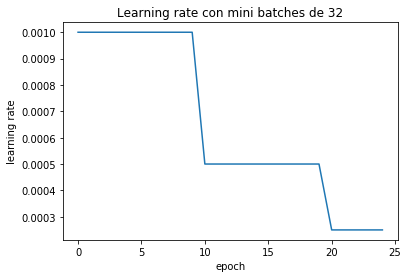

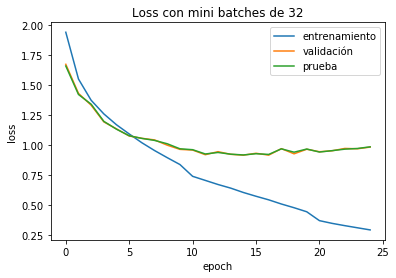

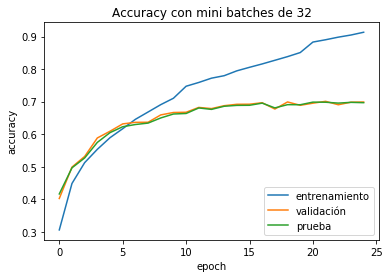

Pérdida 0.9855121005058288
Precisión 0.6968


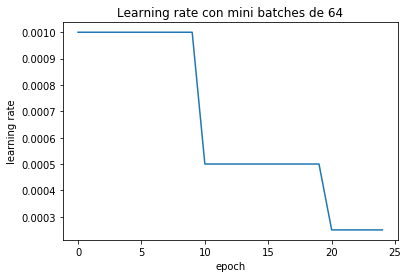

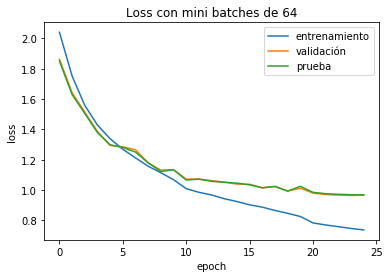

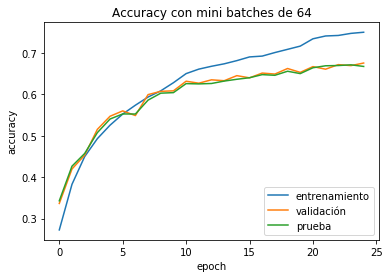

Pérdida 0.9679572329521179
Precisión 0.6678


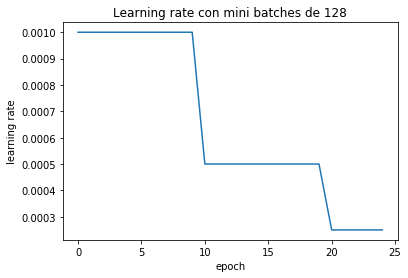

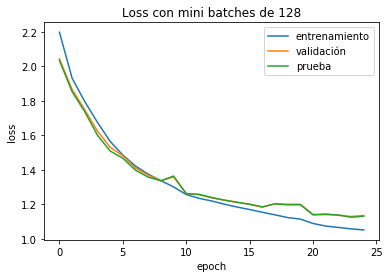

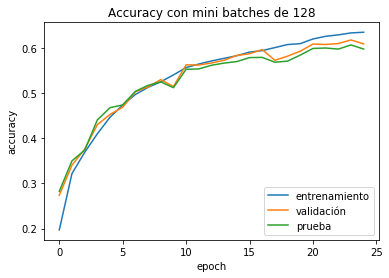

Pérdida 1.131249380683899
Precisión 0.5985


In [40]:
for b_s in resultados_d:
    hist = resultados_d[b_s]['hist']
    score = resultados_d[b_s]['score']
    graficos_d(b_s, hist, score)
    


> En las tres pruebas realizadas se obtuvo un mejor desempeño con un tamaño de batch menor, el de 32 concretamente. Esto podría deberse a que entre menor sea el tamaño del batch más actualizaciones de gradiente son realizadas. Por ello para un número fijo de epochs entre menor sea el tamaño del batch se gana más precisión, pero corriendo el riesgo de overfitting <br>
El _learning rate_ en todas las pruebas se comportó de acuerdo a lo esperado.

> e) La función de perdida más apropiada para este problema es _categorical crossentropy_ ya que al ser un problema de clasificación ésta tiene mejor desempeño que otras como _mse_, que se desempeñan mejor en otros problemas, como regresión.

In [41]:
from keras.optimizers import SGD, rmsprop

def generar_modelo_e():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def entrenar_modelo_e(model):
    opt = rmsprop(lr=0.001, decay=1e-6)

    model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
    hist = model.fit(x_train, y_train,batch_size=32,epochs=25, validation_split=1/12, shuffle=True, 
                     callbacks=[TestLossAcc(x_test, y_test)])
    (loss, acc) = model.evaluate(x_test, y_test)
    return (loss, acc, hist)

In [42]:
modelo_e = generar_modelo_e()
(loss_e, acc_e, hist_e) = entrenar_modelo_e(modelo_e)

Train on 45833 samples, validate on 4167 samples
Epoch 1/25
45833/45833 [==============================] - 25s 548us/step - loss: 1.3523 - acc: 0.5194 - val_loss: 1.1989 - val_acc: 0.5812
 test_loss: 1.2170492643356323 - test_acc: 0.5717 - learning_rate: 0.0010000000474974513
Epoch 2/25
45833/45833 [==============================] - 24s 525us/step - loss: 0.9483 - acc: 0.6717 - val_loss: 1.1162 - val_acc: 0.6290
 test_loss: 1.1129374468803406 - test_acc: 0.6214 - learning_rate: 0.0010000000474974513
Epoch 3/25
45833/45833 [==============================] - 24s 514us/step - loss: 0.7870 - acc: 0.7301 - val_loss: 0.9671 - val_acc: 0.6835
 test_loss: 1.0115792025566102 - test_acc: 0.6688 - learning_rate: 0.0010000000474974513
Epoch 4/25
45833/45833 [==============================] - 24s 519us/step - loss: 0.6568 - acc: 0.7766 - val_loss: 1.0109 - val_acc: 0.7106
 test_loss: 1.0274115545272826 - test_acc: 0.701 - learning_rate: 0.0010000000474974513
Epoch 5/25
45833/45833 [================

In [57]:
modelo_c = generar_modelo_c('same', False)
def entrenar_modelo_e2(model):
    opt = SGD(lr=0.001, decay=1e-6)

    model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
    hist = model.fit(x_train, y_train,batch_size=32,epochs=25, validation_split=1/12, shuffle=True, 
                     callbacks=[TestLossAcc(x_test, y_test)])
    (loss, acc) = model.evaluate(x_test, y_test)
    return (loss, acc, hist)
(loss_c, acc_c, hist_c) = entrenar_modelo_e2(modelo_c)

##### same padding

Train on 45833 samples, validate on 4167 samples
Epoch 1/25
45833/45833 [==============================] - 22s 477us/step - loss: 2.2582 - acc: 0.1825 - val_loss: 2.1967 - val_acc: 0.2599
 test_loss: 2.198300297546387 - test_acc: 0.2582 - learning_rate: 0.0010000000474974513
Epoch 2/25
45833/45833 [==============================] - 21s 455us/step - loss: 2.1159 - acc: 0.2663 - val_loss: 2.0319 - val_acc: 0.2904
 test_loss: 2.0298858652114866 - test_acc: 0.2905 - learning_rate: 0.0010000000474974513
Epoch 3/25
45833/45833 [==============================] - 20s 429us/step - loss: 1.9742 - acc: 0.3081 - val_loss: 1.9295 - val_acc: 0.3249
 test_loss: 1.9239562366485596 - test_acc: 0.3293 - learning_rate: 0.0010000000474974513
Epoch 4/25
45833/45833 [==============================] - 20s 432us/step - loss: 1.8992 - acc: 0.3361 - val_loss: 1.8921 - val_acc: 0.3290
 test_loss: 1.8833151552200318 - test_acc: 0.3325 - learning_rate: 0.0010000000474974513
Epoch 5/25
45833/45833 [================

In [58]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

def graficos_e(hist, loss, acc):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['test_loss'])
    plt.title('Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['entrenamiento', 'validación', 'prueba'], loc='upper right')
    plt.show()

    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.plot(hist.history['test_acc'])
    plt.title('Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['entrenamiento', 'validación', 'prueba'], loc='lower right')
    plt.show()

    print("Pérdida", loss)
    print("Precisión", acc)
    
def mapa_calor(model):
    predicciones = model.predict(x_test, verbose=0)
    cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predicciones, axis=1))
    df_cm = pd.DataFrame(cm, range(10), range(10))

    with sn.plotting_context("notebook", font_scale=1.5):
        plt.figure(figsize = (10,7))
        sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})

        label_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']
        plt.xticks(np.arange(len(label_names)), label_names, rotation=45)
        plt.yticks(np.arange(len(label_names)), label_names, rotation=45)

        plt.tight_layout()
        plt.ylabel('Categoría real')
        plt.xlabel('Categoría red')
        plt.show()


#### Modelo c)

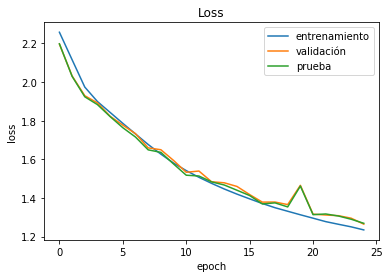

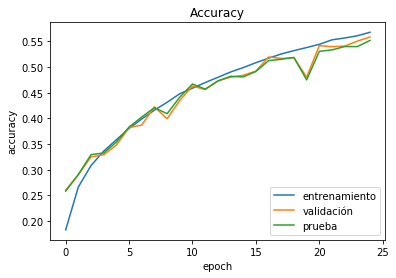

Pérdida 1.2686934448242186
Precisión 0.5521


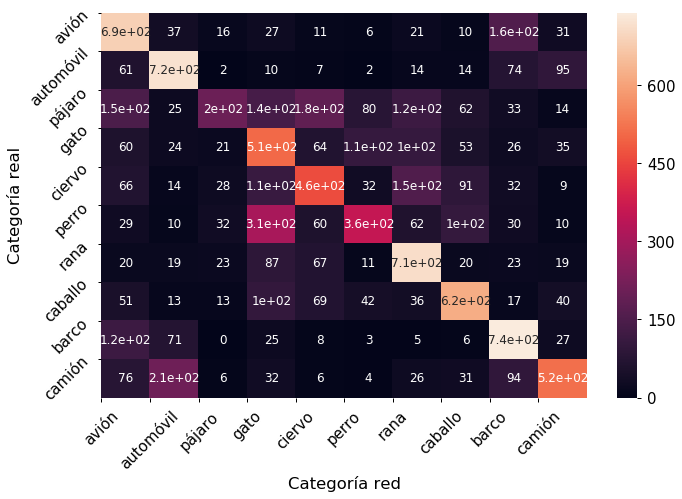

#### Modelo e)

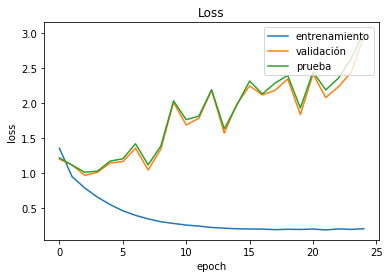

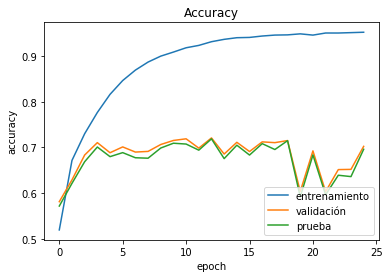

Pérdida 3.0075102109909055
Precisión 0.696


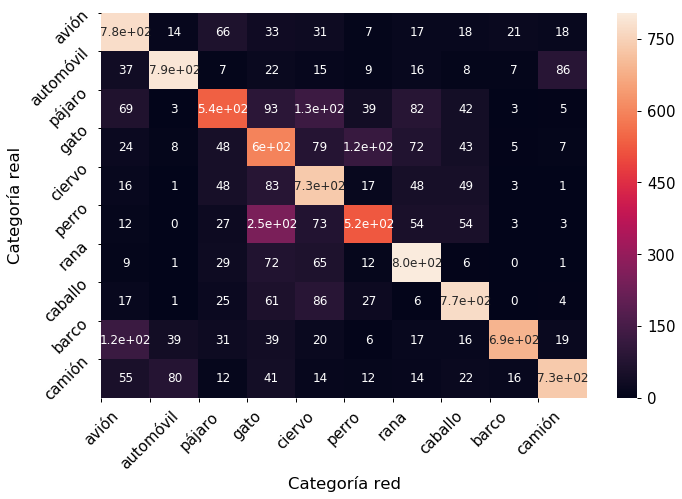

In [59]:
display(Markdown("#### Modelo c)"))
graficos_e(hist_c, loss_c, acc_c)
mapa_calor(modelo_c)
display(Markdown("#### Modelo e)"))
graficos_e(hist_e, loss_e, acc_e)
mapa_calor(modelo_e)

> f)

In [51]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.training_utils import multi_gpu_model

def crear_modelo_superficial_f(tamanyo_filtro):
    model = Sequential()
    model.add(Conv2D(64, (tamanyo_filtro, tamanyo_filtro), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def crear_modelo_profundo_f(tamanyo_filtro):
    model = Sequential()
    model.add(Conv2D(64, (tamanyo_filtro, tamanyo_filtro), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (tamanyo_filtro, tamanyo_filtro), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def hiperparametros_f(valores_filtro):
    opt = rmsprop(lr=0.001, decay=1e-6)
    redes_profundas = []
    redes_superficiales = []
    for filtro in valores_filtro:
        display(Markdown("##### fitros tamaño " + str(filtro)))
        
        model = crear_modelo_superficial_f(filtro)
        model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
        hist = model.fit(x_train, y_train, batch_size=32,epochs=15, validation_split=1/12, shuffle=True, 
                         callbacks=[TestLossAcc(x_test, y_test)])
        (loss, acc) = model.evaluate(x_test, y_test)
        redes_superficiales.append({'filtro':filtro,
                                    'hist':hist,
                                    'loss':loss,
                                    'acc': acc,
                                    'model':model,
                                   })
        
        
        
        model = crear_modelo_profundo_f(filtro)
        model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
        hist = model.fit(x_train, y_train,batch_size=32,epochs=15, validation_split=1/12, shuffle=True, 
                         callbacks=[TestLossAcc(x_test, y_test)])
        (loss, acc) = model.evaluate(x_test, y_test)
        redes_profundas.append({'filtro':filtro,
                                'hist':hist,
                                'loss':loss,
                                'acc': acc,
                                'model':model,
                               })
    
    return (redes_superficiales, redes_profundas)

In [52]:
(shallow_f, deep_f) = hiperparametros_f([4,5,6,7])

##### fitros tamaño 4

Train on 45833 samples, validate on 4167 samples
Epoch 1/15
45833/45833 [==============================] - 40s 882us/step - loss: 1.4287 - acc: 0.5008 - val_loss: 1.2369 - val_acc: 0.5716
 test_loss: 1.2541668138504027 - test_acc: 0.5593 - learning_rate: 0.0010000000474974513
Epoch 2/15
45833/45833 [==============================] - 39s 856us/step - loss: 1.0561 - acc: 0.6333 - val_loss: 1.1267 - val_acc: 0.6199
 test_loss: 1.1339028875350952 - test_acc: 0.6072 - learning_rate: 0.0010000000474974513
Epoch 3/15
45833/45833 [==============================] - 39s 858us/step - loss: 0.8666 - acc: 0.7027 - val_loss: 1.0930 - val_acc: 0.6494
 test_loss: 1.0903232029914856 - test_acc: 0.6397 - learning_rate: 0.0010000000474974513
Epoch 4/15
45833/45833 [==============================] - 40s 863us/step - loss: 0.7180 - acc: 0.7548 - val_loss: 1.1670 - val_acc: 0.6506
 test_loss: 1.1889735401153565 - test_acc: 0.6387 - learning_rate: 0.0010000000474974513
Epoch 5/15
45833/45833 [===============

##### fitros tamaño 5

Train on 45833 samples, validate on 4167 samples
Epoch 1/15
45833/45833 [==============================] - 40s 875us/step - loss: 1.4760 - acc: 0.4822 - val_loss: 1.6170 - val_acc: 0.4560
 test_loss: 1.6214491510391236 - test_acc: 0.4516 - learning_rate: 0.0010000000474974513
Epoch 2/15
45833/45833 [==============================] - 40s 869us/step - loss: 1.0893 - acc: 0.6225 - val_loss: 1.3354 - val_acc: 0.5419
 test_loss: 1.3528353677749634 - test_acc: 0.5416 - learning_rate: 0.0010000000474974513
Epoch 3/15
45833/45833 [==============================] - 40s 871us/step - loss: 0.8938 - acc: 0.6937 - val_loss: 1.0810 - val_acc: 0.6434
 test_loss: 1.1204668186187745 - test_acc: 0.6259 - learning_rate: 0.0010000000474974513
Epoch 4/15
45833/45833 [==============================] - 40s 873us/step - loss: 0.7331 - acc: 0.7532 - val_loss: 1.1545 - val_acc: 0.6441
 test_loss: 1.149630269241333 - test_acc: 0.6428 - learning_rate: 0.0010000000474974513
Epoch 5/15
45833/45833 [================

##### fitros tamaño 6

Train on 45833 samples, validate on 4167 samples
Epoch 1/15
45833/45833 [==============================] - 40s 873us/step - loss: 1.4932 - acc: 0.4764 - val_loss: 1.2892 - val_acc: 0.5534
 test_loss: 1.2847615312576295 - test_acc: 0.541 - learning_rate: 0.0010000000474974513
Epoch 2/15
45833/45833 [==============================] - 41s 897us/step - loss: 1.1121 - acc: 0.6131 - val_loss: 1.3566 - val_acc: 0.5488
 test_loss: 1.3533360198974609 - test_acc: 0.539 - learning_rate: 0.0010000000474974513
Epoch 3/15
45833/45833 [==============================] - 40s 880us/step - loss: 0.9266 - acc: 0.6825 - val_loss: 1.1080 - val_acc: 0.6271
 test_loss: 1.1297167596817017 - test_acc: 0.6116 - learning_rate: 0.0010000000474974513
Epoch 4/15
45833/45833 [==============================] - 40s 874us/step - loss: 0.7712 - acc: 0.7370 - val_loss: 1.1655 - val_acc: 0.6369
 test_loss: 1.176135537338257 - test_acc: 0.6257 - learning_rate: 0.0010000000474974513
Epoch 5/15
45833/45833 [==================

##### fitros tamaño 7

Train on 45833 samples, validate on 4167 samples
Epoch 1/15
45833/45833 [==============================] - 42s 910us/step - loss: 1.5284 - acc: 0.4655 - val_loss: 1.4210 - val_acc: 0.5037
 test_loss: 1.4049005123138427 - test_acc: 0.5069 - learning_rate: 0.0010000000474974513
Epoch 2/15
45833/45833 [==============================] - 40s 882us/step - loss: 1.1371 - acc: 0.6052 - val_loss: 1.3140 - val_acc: 0.5628
 test_loss: 1.321347992515564 - test_acc: 0.5508 - learning_rate: 0.0010000000474974513
Epoch 3/15
45833/45833 [==============================] - 41s 895us/step - loss: 0.9494 - acc: 0.6732 - val_loss: 1.1584 - val_acc: 0.6204
 test_loss: 1.1766111354827882 - test_acc: 0.6082 - learning_rate: 0.0010000000474974513
Epoch 4/15
45833/45833 [==============================] - 41s 887us/step - loss: 0.7987 - acc: 0.7295 - val_loss: 1.2718 - val_acc: 0.6000
 test_loss: 1.268439210319519 - test_acc: 0.5925 - learning_rate: 0.0010000000474974513
Epoch 5/15
45833/45833 [=================

##### Red no profunda con fitros de tamaño 4

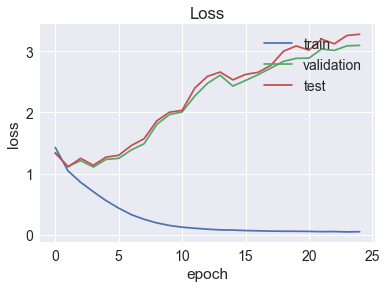

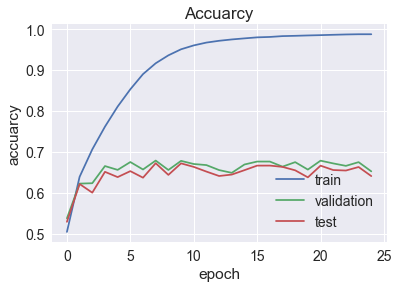

Test loss 3.2781079399108886
Test accuracy 0.6407
10000/10000 [==============================] - 3s 346us/step


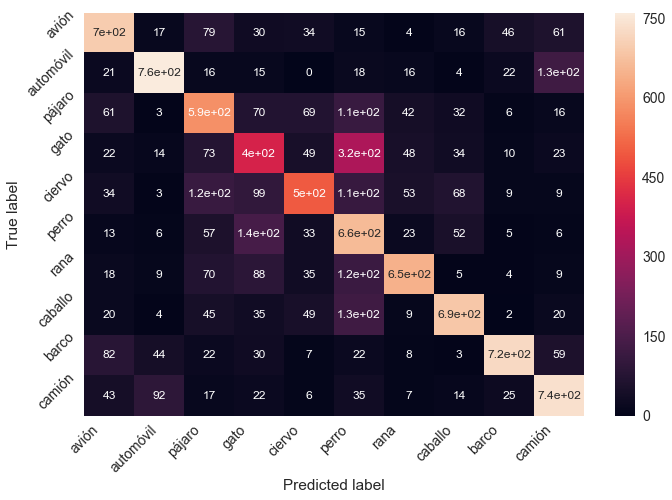

##### Red profunda con fitros de tamaño 4

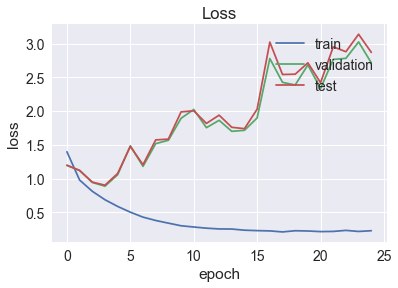

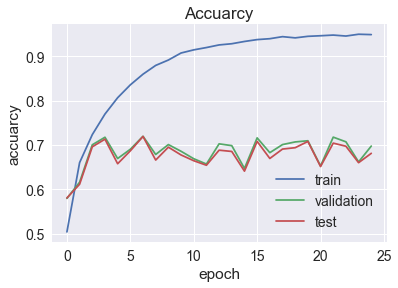

Test loss 2.869080786895752
Test accuracy 0.6815
10000/10000 [==============================] - 2s 246us/step


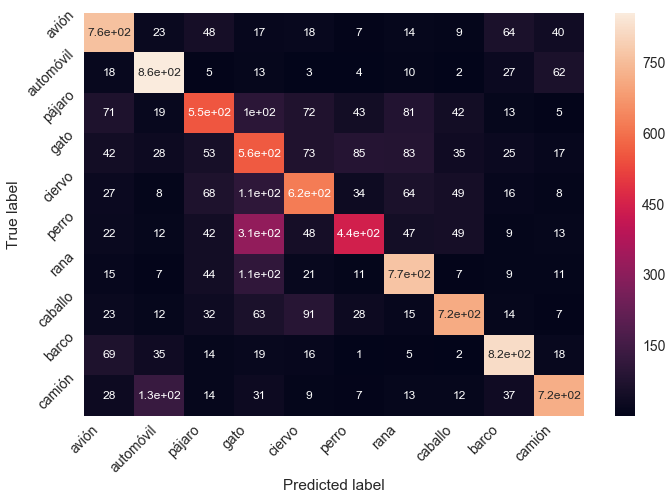

##### Red no profunda con fitros de tamaño 5

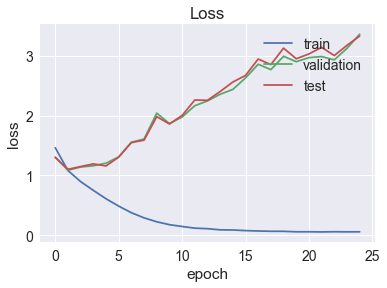

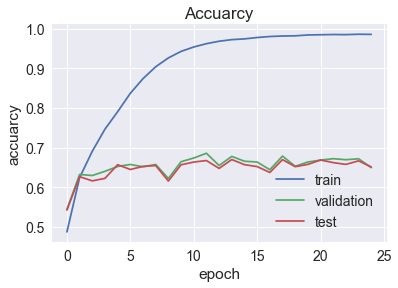

Test loss 3.3291673027038575
Test accuracy 0.6508
10000/10000 [==============================] - 2s 200us/step


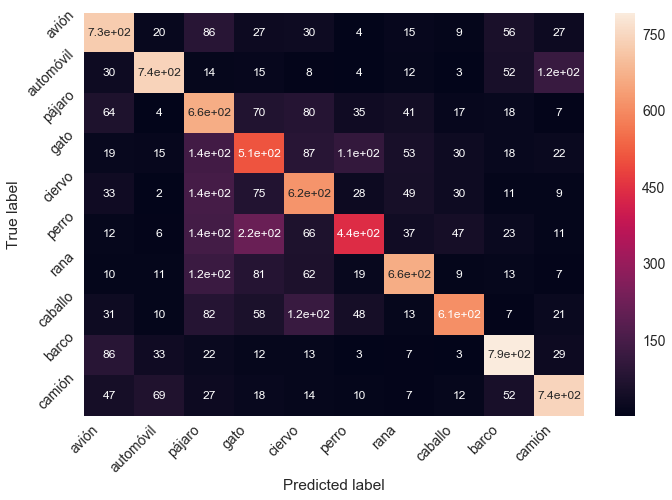

##### Red profunda con fitros de tamaño 5

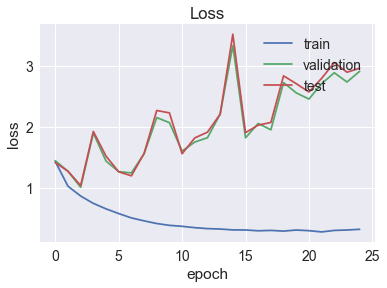

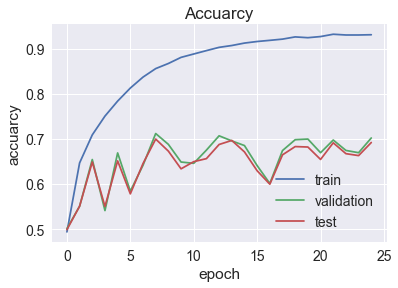

Test loss 2.961744326210022
Test accuracy 0.6919
10000/10000 [==============================] - 2s 239us/step


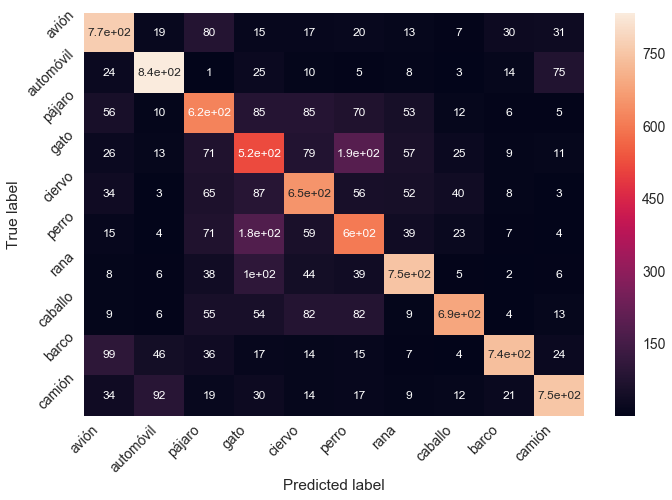

##### Red no profunda con fitros de tamaño 6

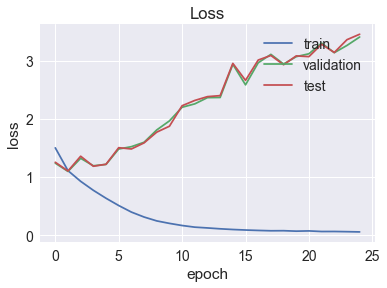

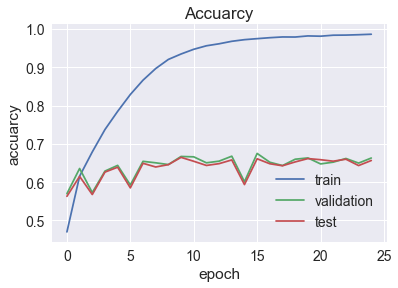

Test loss 3.4565213947296143
Test accuracy 0.6566
10000/10000 [==============================] - 2s 212us/step


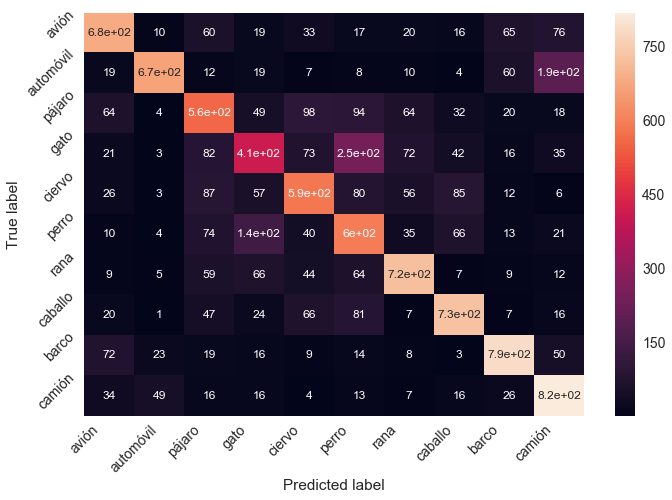

##### Red profunda con fitros de tamaño 6

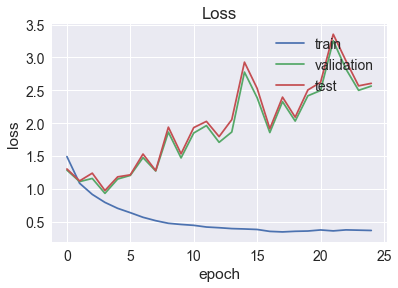

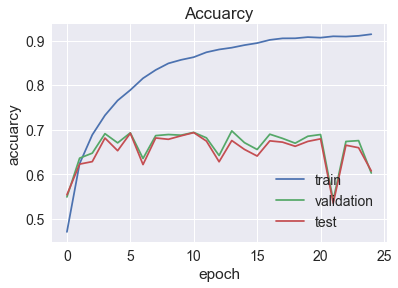

Test loss 2.606658219909668
Test accuracy 0.6072
10000/10000 [==============================] - 3s 290us/step


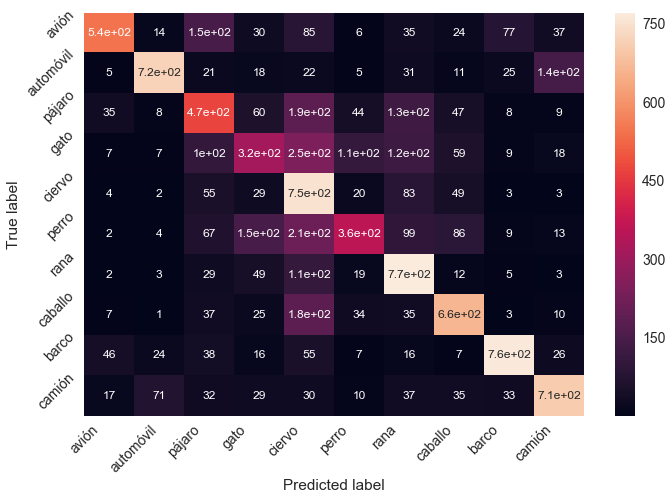

##### Red no profunda con fitros de tamaño 7

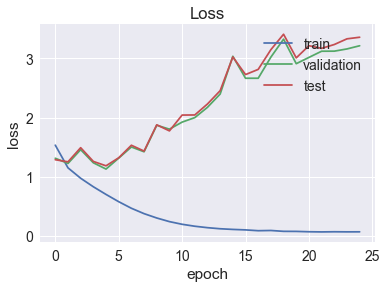

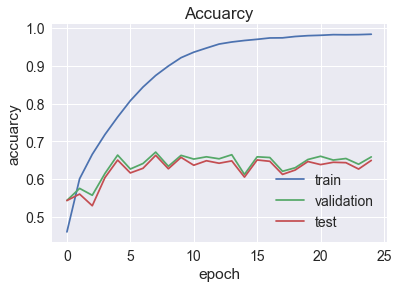

Test loss 3.359130299758911
Test accuracy 0.6492
10000/10000 [==============================] - 2s 215us/step


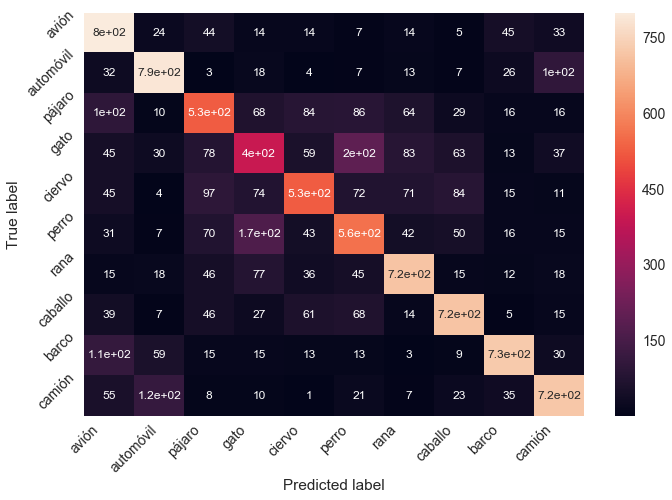

##### Red profunda con fitros de tamaño 7

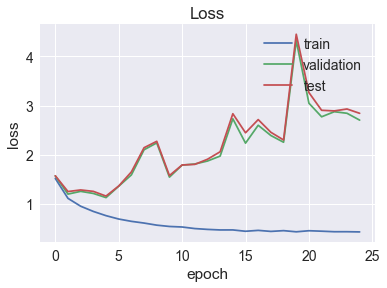

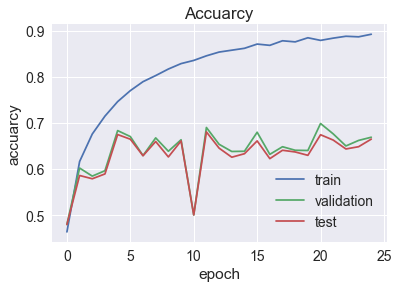

Test loss 2.841995498085022
Test accuracy 0.6652
10000/10000 [==============================] - 3s 270us/step


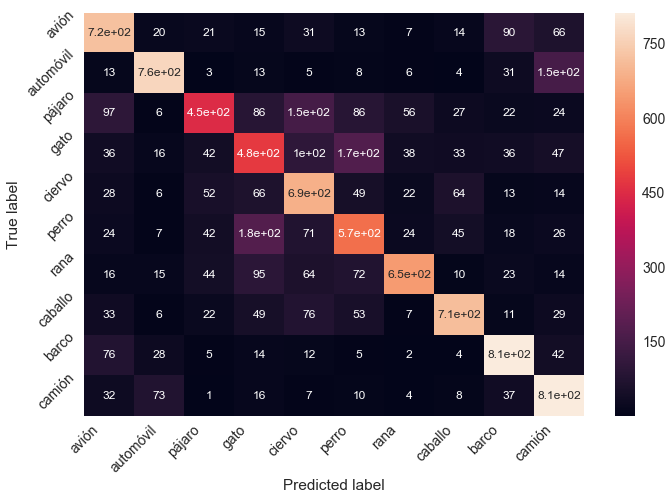

In [35]:
for s,d in zip(shallow, deep):
    display(Markdown("##### Red no profunda con fitros de tamaño " + str(s['filtro'])))
    grafico_acc_loss_eval(s['hist'], s['loss'], s['acc'])
    mapa_calor(s['model'])
    display(Markdown("##### Red profunda con fitros de tamaño " + str(d['filtro'])))
    grafico_acc_loss_eval(d['hist'], d['loss'], d['acc'])
    mapa_calor(d['model'])

> g)

In [21]:
from keras.optimizers import Adam

def generar_modelo_g():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def hiperparametros_g(optimizadores, learning_rates, decaimiento):
    resultados = {}
    for optimizador in optimizadores:
        if optimizador.__name__ not in resultados:
            resultados[optimizador.__name__] = list()
        for learning_rate in learning_rates:
            display(Markdown("##### optimizador: " + optimizador.__name__ + ", learning rate: " + str(learning_rate)))
            modelo = generar_modelo_g()
            modelo.compile(optimizer=optimizador(lr=learning_rate, decay=decaimiento),loss='categorical_crossentropy', metrics=['accuracy'])
            hist = modelo.fit(x_train, y_train,batch_size=32,epochs=25, validation_split=1/12, shuffle=True, 
                     callbacks=[TestLossAcc(x_test, y_test)])
            (loss, acc) = modelo.evaluate(x_test, y_test)
            resultados[optimizador.__name__].append({'lr':learning_rate, 'hist':hist, 'loss':loss, 'acc':acc})
    
    return resultados

In [22]:
resultado_g = hiperparametros_g(optimizadores = [rmsprop, Adam], learning_rates=[0.001, 0.0001], decaimiento = 1e-6)

##### optimizador: RMSprop, learning rate: 0.001

Train on 45833 samples, validate on 4167 samples
Epoch 1/25
45833/45833 [==============================] - 61s 1ms/step - loss: 1.4470 - acc: 0.4842 - val_loss: 1.1918 - val_acc: 0.5949
 test_loss: 1.181353292655945 - test_acc: 0.6042
Epoch 2/25
45833/45833 [==============================] - 58s 1ms/step - loss: 0.9529 - acc: 0.6696 - val_loss: 0.8883 - val_acc: 0.6950
 test_loss: 0.9168860237121582 - test_acc: 0.6859
Epoch 3/25
45833/45833 [==============================] - 58s 1ms/step - loss: 0.8140 - acc: 0.7211 - val_loss: 0.8094 - val_acc: 0.7283
 test_loss: 0.8222305295944213 - test_acc: 0.7212
Epoch 4/25
45833/45833 [==============================] - 57s 1ms/step - loss: 0.7484 - acc: 0.7474 - val_loss: 0.7620 - val_acc: 0.7579
 test_loss: 0.7907171084403992 - test_acc: 0.7475
Epoch 5/25
45833/45833 [==============================] - 58s 1ms/step - loss: 0.7255 - acc: 0.7617 - val_loss: 0.8356 - val_acc: 0.7199
 test_loss: 0.8463575434684754 - test_acc: 0.7195
Epoch 6/25
45833/

##### optimizador: RMSprop, learning rate: 0.0001

Train on 45833 samples, validate on 4167 samples
Epoch 1/25
45833/45833 [==============================] - 60s 1ms/step - loss: 1.6155 - acc: 0.4146 - val_loss: 1.4744 - val_acc: 0.4502
 test_loss: 1.4843760032653808 - test_acc: 0.4553
Epoch 2/25
45833/45833 [==============================] - 58s 1ms/step - loss: 1.2368 - acc: 0.5626 - val_loss: 1.1394 - val_acc: 0.5949
 test_loss: 1.1434640281677246 - test_acc: 0.5894
Epoch 3/25
45833/45833 [==============================] - 59s 1ms/step - loss: 1.0555 - acc: 0.6276 - val_loss: 1.0945 - val_acc: 0.6204
 test_loss: 1.091938275527954 - test_acc: 0.6193
Epoch 4/25
45833/45833 [==============================] - 58s 1ms/step - loss: 0.9253 - acc: 0.6760 - val_loss: 0.9776 - val_acc: 0.6638
 test_loss: 1.0028596781730652 - test_acc: 0.6513
Epoch 5/25
45833/45833 [==============================] - 58s 1ms/step - loss: 0.8253 - acc: 0.7148 - val_loss: 0.8609 - val_acc: 0.7039
 test_loss: 0.8743108630180358 - test_acc: 0.6934
Epoch 6/25
45833/

##### optimizador: Adam, learning rate: 0.001

Train on 45833 samples, validate on 4167 samples
Epoch 1/25
45833/45833 [==============================] - 64s 1ms/step - loss: 1.4288 - acc: 0.4832 - val_loss: 1.1151 - val_acc: 0.6026
 test_loss: 1.1178582578659058 - test_acc: 0.6002
Epoch 2/25
45833/45833 [==============================] - 62s 1ms/step - loss: 0.9893 - acc: 0.6488 - val_loss: 0.8744 - val_acc: 0.6933
 test_loss: 0.8907978517532349 - test_acc: 0.68
Epoch 3/25
45833/45833 [==============================] - 62s 1ms/step - loss: 0.8041 - acc: 0.7149 - val_loss: 0.7451 - val_acc: 0.7480
 test_loss: 0.7875633460998536 - test_acc: 0.728
Epoch 4/25
45833/45833 [==============================] - 62s 1ms/step - loss: 0.6788 - acc: 0.7588 - val_loss: 0.6914 - val_acc: 0.7660
 test_loss: 0.7168418096542358 - test_acc: 0.7529
Epoch 5/25
45833/45833 [==============================] - 62s 1ms/step - loss: 0.5791 - acc: 0.7973 - val_loss: 0.7158 - val_acc: 0.7564
 test_loss: 0.7296009669780731 - test_acc: 0.7495
Epoch 6/25
45833/45

##### optimizador: Adam, learning rate: 0.0001

Train on 45833 samples, validate on 4167 samples
Epoch 1/25
45833/45833 [==============================] - 63s 1ms/step - loss: 1.5731 - acc: 0.4336 - val_loss: 1.2882 - val_acc: 0.5395
 test_loss: 1.2963897317886353 - test_acc: 0.5381
Epoch 2/25
45833/45833 [==============================] - 62s 1ms/step - loss: 1.1823 - acc: 0.5797 - val_loss: 1.0748 - val_acc: 0.6280
 test_loss: 1.0849563131332398 - test_acc: 0.6187
Epoch 3/25
45833/45833 [==============================] - 62s 1ms/step - loss: 1.0096 - acc: 0.6472 - val_loss: 0.9315 - val_acc: 0.6791
 test_loss: 0.9430885561943054 - test_acc: 0.6726
Epoch 4/25
45833/45833 [==============================] - 62s 1ms/step - loss: 0.8904 - acc: 0.6880 - val_loss: 0.8468 - val_acc: 0.7048
 test_loss: 0.8608444327354431 - test_acc: 0.7035
Epoch 5/25
45833/45833 [==============================] - 62s 1ms/step - loss: 0.7926 - acc: 0.7237 - val_loss: 0.8025 - val_acc: 0.7228
 test_loss: 0.8197958791732788 - test_acc: 0.7135
Epoch 6/25
45833

In [23]:
#grafico_acc_loss_eval(hist, loss, acc)
#mapa_calor(model)

> h)

In [9]:
def generar_modelo_h():
    model_h1 = Sequential()
    model_h1.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model_h1.add(Activation('relu'))
    model_h1.add(Conv2D(64, (3, 3), padding='same'))
    model_h1.add(Activation('relu'))
    model_h1.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
    model_h1.add(Dropout(0.25))

    model_h1.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model_h1.add(Activation('relu'))
    model_h1.add(Conv2D(128, (3, 3), padding='same'))
    model_h1.add(Activation('relu'))
    model_h1.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model_h1.add(Dropout(0.25))

    model_h1.add(Flatten())
    model_h1.add(Dense(512))
    model_h1.add(Activation('relu'))
    model_h1.add(Dense(10))
    model_h1.add(Activation('softmax'))
    return model_h1

generar_modelo_h().summary()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 128)       73856     
__________

In [14]:
opt_adam = Adam(lr=0.001, decay=1e-6)
opt_rms = rmsprop(lr=0.001, decay=1e-6)

modelo_h1 = generar_modelo_h()
modelo_h2 = generar_modelo_h()


display(Markdown("##### Adam"))
modelo_h1.compile(optimizer=opt_adam,loss='categorical_crossentropy', metrics=['accuracy'])
hist_h1 = modelo_h1.fit(x_train, y_train,batch_size=32,epochs=25, validation_split=1/12, shuffle=True, 
                 callbacks=[TestLossAcc(x_test, y_test)])
(loss_h1, acc_h1) = modelo_h1.evaluate(x_test, y_test)

display(Markdown("##### RMSProp"))
modelo_h2.compile(optimizer=opt_rms,loss='categorical_crossentropy', metrics=['accuracy'])
hist_h2 = modelo_h2.fit(x_train, y_train,batch_size=32,epochs=25, validation_split=1/12, shuffle=True, 
                 callbacks=[TestLossAcc(x_test, y_test)])
(loss_h2, acc_h2) = modelo_h2.evaluate(x_test, y_test)

##### Adam

Train on 45833 samples, validate on 4167 samples
Epoch 1/25
45833/45833 [==============================] - 81s 2ms/step - loss: 1.4834 - acc: 0.4628 - val_loss: 1.1775 - val_acc: 0.5796
 test_loss: 1.18618757648468 - test_acc: 0.581
Epoch 2/25
45833/45833 [==============================] - 74s 2ms/step - loss: 0.9804 - acc: 0.6535 - val_loss: 0.9419 - val_acc: 0.6825
 test_loss: 0.9872794562339783 - test_acc: 0.6636
Epoch 3/25
45833/45833 [==============================] - 74s 2ms/step - loss: 0.7587 - acc: 0.7326 - val_loss: 0.8170 - val_acc: 0.7216
 test_loss: 0.8553679193496704 - test_acc: 0.7067
Epoch 4/25
45833/45833 [==============================] - 74s 2ms/step - loss: 0.5824 - acc: 0.7943 - val_loss: 0.8548 - val_acc: 0.7161
 test_loss: 0.8887568232536316 - test_acc: 0.7057
Epoch 5/25
45833/45833 [==============================] - 79s 2ms/step - loss: 0.4221 - acc: 0.8519 - val_loss: 0.9935 - val_acc: 0.6892
 test_loss: 1.0041093517780304 - test_acc: 0.6878
Epoch 6/25
45833/45

##### RMSProp

Train on 45833 samples, validate on 4167 samples
Epoch 1/25
45833/45833 [==============================] - 72s 2ms/step - loss: 1.6506 - acc: 0.4101 - val_loss: 1.4169 - val_acc: 0.4927
 test_loss: 1.40874382648468 - test_acc: 0.4991
Epoch 2/25
45833/45833 [==============================] - 71s 2ms/step - loss: 1.0764 - acc: 0.6228 - val_loss: 1.1710 - val_acc: 0.5923
 test_loss: 1.1919067337036133 - test_acc: 0.5911
Epoch 3/25
45833/45833 [==============================] - 71s 2ms/step - loss: 0.8682 - acc: 0.7007 - val_loss: 0.9738 - val_acc: 0.6755
 test_loss: 0.9861520740509033 - test_acc: 0.6685
Epoch 4/25
45833/45833 [==============================] - 71s 2ms/step - loss: 0.7357 - acc: 0.7509 - val_loss: 0.9669 - val_acc: 0.6859
 test_loss: 0.9774022050857544 - test_acc: 0.6797
Epoch 5/25
45833/45833 [==============================] - 71s 2ms/step - loss: 0.6300 - acc: 0.7870 - val_loss: 0.8998 - val_acc: 0.7187
 test_loss: 0.9065974028587341 - test_acc: 0.7023
Epoch 6/25
45833/4

##### Adam

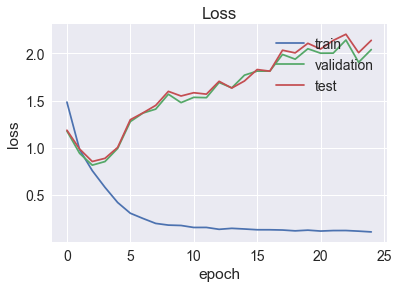

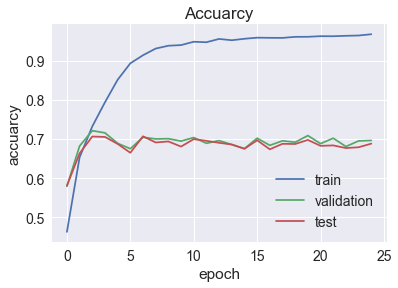

Test loss 2.1359746490478515
Test accuracy 0.6885
10000/10000 [==============================] - 4s 419us/step


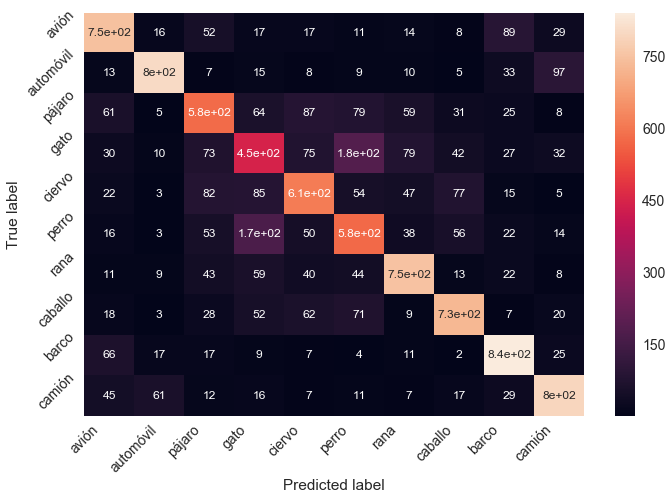

##### RMSProp

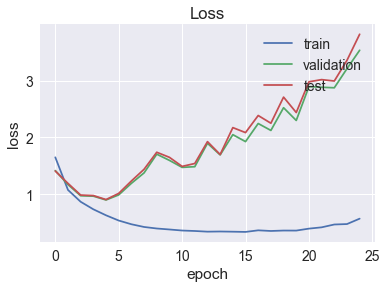

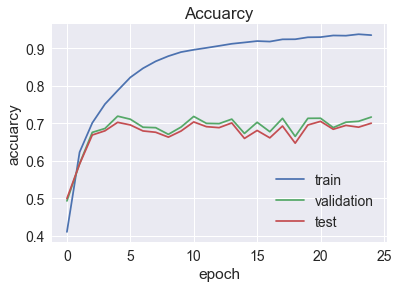

Test loss 3.8167158878326415
Test accuracy 0.7
10000/10000 [==============================] - 4s 437us/step


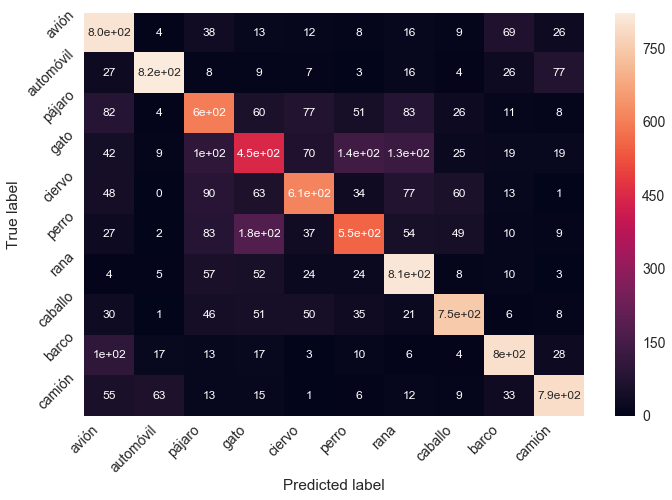

In [16]:
display(Markdown("##### Adam"))
grafico_acc_loss_eval(hist_h1, loss_h1, acc_h1)
mapa_calor(modelo_h1)
display(Markdown("##### RMSProp"))
grafico_acc_loss_eval(hist_h2, loss_h2, acc_h2)
mapa_calor(modelo_h2)

> i)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images

split = x_train.shape[0] - x_train.shape[0]//12
x_train_t = x_train[0:split].copy()
y_train_t = y_train[0:split].copy()

x_val_t = x_train[split:].copy()
y_val_t = y_train[0:split].copy()

datagen.fit(x_train_t)
model.fit_generator(datagen.flow(x_train_t, y_train_t, batch_size=32),steps_per_epoch=x_train_t.shape[0] // 32, epochs=25, validation_data=(x_val_t, y_val_t))